In [42]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sab

In [43]:
F = len("Jaromir")
L = len("Wegrzyn")
N = (L + F)*100
print(f"F = {F}, L = {L}, N = {N}")

F = 7, L = 7, N = 1400


# **Lab 6 - Model comparison**

### Excercise 1 - generate data

In [44]:
model_1=CmdStanModel(stan_file='code_1.stan')
N_data = {'N': N}

INFO:cmdstanpy:found newer exe file, not recompiling


In [45]:
sim_1=model_1.sample(data=N_data,
                     iter_sampling=1,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,
                     refresh=1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [46]:
dataframe_1=sim_1.draws_pd()
dataframe_1.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1391],y[1392],y[1393],y[1394],y[1395],y[1396],y[1397],y[1398],y[1399],y[1400]
0,0.0,0.0,0.01,-0.424502,-0.063661,-0.833885,1.55158,-0.362245,0.743487,0.970844,...,-0.172749,1.53637,0.74268,-0.073685,2.03962,-0.166802,-0.200499,-0.304691,-0.304062,0.812941


In [47]:
model_2=CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [48]:
sim_2=model_2.sample(data=N_data,
                     iter_sampling=1,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,
                     refresh=1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [49]:
dataframe_2=sim_2.draws_pd()
dataframe_2.head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1391],y[1392],y[1393],y[1394],y[1395],y[1396],y[1397],y[1398],y[1399],y[1400]
0,0.0,0.0,2.70817,0.777181,-1.27227,0.127591,-1.38942,0.246162,1.19873,2.26533,...,-0.580623,-3.87758,0.432652,-0.723898,2.00589,1.74348,-1.54076,-0.564548,0.183165,3.44084


### Excercise 2 - compare normal and student models

In [50]:
y_data = dataframe_1.loc[0, "y[1]": f"y[{N}]"]
data_ = {'N': N, 'y': y_data}
R = 1000

In [51]:
model_3=CmdStanModel(stan_file='code_3.stan')
model_4=CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [52]:
sim_3=model_3.sample(data=data_,
                     iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,
                     refresh=R)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [53]:
sim_4=model_4.sample(data=data_,
                     iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,
                     refresh=R)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [54]:
dataframe_3=sim_3.draws_pd()
dataframe_3.head()

,lp__,accept_stat__,sigma,mu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],log_lik[6],...,y_hat[1391],y_hat[1392],y_hat[1393],y_hat[1394],y_hat[1395],y_hat[1396],y_hat[1397],y_hat[1398],y_hat[1399],y_hat[1400]
0,0.0,0.0,0.815985,0.899524,-2.03201,-1.41225,-2.97193,-1.03486,-1.91112,-0.733863,...,1.117900,-0.204379,1.652360,0.790490,1.049820,0.502677,0.450047,0.101082,1.007090,2.203670
1,0.0,0.0,0.815985,0.899524,-2.03201,-1.41225,-2.97193,-1.03486,-1.91112,-0.733863,...,0.139626,0.889336,0.770010,0.541178,2.814750,1.747510,-0.106848,1.119880,1.245970,0.669973
2,0.0,0.0,0.815985,0.899524,-2.03201,-1.41225,-2.97193,-1.03486,-1.91112,-0.733863,...,1.274380,0.626974,0.167241,1.929690,-0.170927,1.055260,1.417630,-0.006020,1.943450,2.238570
3,0.0,0.0,0.815985,0.899524,-2.03201,-1.41225,-2.97193,-1.03486,-1.91112,-0.733863,...,0.561457,0.089741,0.242537,0.370165,0.855705,2.190020,1.288560,2.268160,-0.034560,0.658929
4,0.0,0.0,0.815985,0.899524,-2.03201,-1.41225,-2.97193,-1.03486,-1.91112,-0.733863,...,0.914080,1.792460,1.550380,0.579077,0.937800,-0.664691,0.086077,0.468764,0.699627,1.310040


In [55]:
dataframe_4=sim_4.draws_pd()
dataframe_4.head()

,lp__,accept_stat__,sigma,mu,nu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],...,y_hat[1391],y_hat[1392],y_hat[1393],y_hat[1394],y_hat[1395],y_hat[1396],y_hat[1397],y_hat[1398],y_hat[1399],y_hat[1400]
0,0.0,0.0,0.815985,0.899524,5.44859,-2.03228,-1.49543,-2.7066,-1.11854,-1.93434,...,1.96117,-0.076404,0.730758,1.33551,1.972550,0.666709,1.380130,0.927500,1.525550,0.395094
1,0.0,0.0,0.815985,0.899524,5.44859,-2.03228,-1.49543,-2.7066,-1.11854,-1.93434,...,2.76647,2.141770,1.594070,1.70222,0.892996,1.161360,1.506730,1.519180,-0.060489,0.244630
2,0.0,0.0,0.815985,0.899524,5.44859,-2.03228,-1.49543,-2.7066,-1.11854,-1.93434,...,1.32518,-0.110563,0.812951,-1.05473,2.077190,1.146820,2.476890,0.211898,0.566336,2.261140
3,0.0,0.0,0.815985,0.899524,5.44859,-2.03228,-1.49543,-2.7066,-1.11854,-1.93434,...,1.48813,0.402835,1.968830,1.81835,0.193077,-0.618686,1.775920,1.067390,0.453174,-0.251487
4,0.0,0.0,0.815985,0.899524,5.44859,-2.03228,-1.49543,-2.7066,-1.11854,-1.93434,...,-3.71810,0.834734,0.436568,2.42292,3.587130,-0.447192,-0.259813,1.902460,1.736390,0.815895


### **Model comparison**

#### **Normal model**

### **LOO**

In [56]:
az.loo(sim_3)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 1000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo -4262.42   480.42
p_loo        0.00        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad) 1400  100.0%

### **WAIC**

In [57]:
az.waic(sim_3)

Computed from 1000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic -4262.42   480.42
p_waic        0.00        -

#### **Student model**

### **LOO**

In [58]:
az.loo(sim_4)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 1000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo -2688.53    54.29
p_loo        0.00        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad) 1400  100.0%

### **WAIC**

In [59]:
az.waic(sim_4)

Computed from 1000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic -2688.53    54.29
p_waic        0.00        -

### LOO model comparison

In [60]:
model_3_fit_1 = az.from_cmdstanpy(posterior=sim_3)
model_4_fit_1 = az.from_cmdstanpy(posterior=sim_4)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


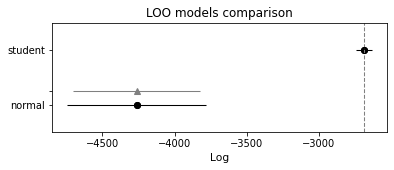

In [61]:
loo = az.compare({"normal": model_3_fit_1, "student": model_4_fit_1}, ic="loo")
az.plot_compare(loo)
plt.title("LOO models comparison")
plt.show()

### WAIC model comparison

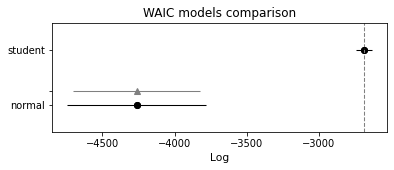

In [62]:
waic = az.compare({"normal": model_3_fit_1, "student": model_4_fit_1}, ic="waic")
az.plot_compare(waic)
plt.title("WAIC models comparison")
plt.show()

### Excercise 3 - compare models with different numbers of predictors

In [63]:
model_5=CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [64]:
models = []
predictors = [1, 2, 3]
y_data = dataframe_2.loc[0, "y[1]": f"y[{N}]"]

for pred in predictors:
    x_data = dataframe_2.loc[:, "X[1,1]":f"X[{N},{pred}]"].values.reshape((N, pred))
    data_ = {'N': N, 'K': pred, 'y': y_data, 'X': x_data}

    sim_5=model_5.sample(data=data_,
                     iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,
                     refresh=R)
    models.append(sim_5)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


### **LOO and WAIC**

In [65]:
for i in range(len(models)):
    print(f"|=========LOO-{predictors[i]}=========|")
    print(az.loo(models[i]))
    print(f"|=========WAIC-{predictors[i]}=========|")
    print(az.waic(models[i]))

|=========LOO-1=========|


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 1000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo -4684.09   136.04
p_loo        0.00        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad) 1400  100.0%

|=========WAIC-1=========|
Computed from 1000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic -4684.09   136.04
p_waic        0.00        -
|=========LOO-2=========|


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 1000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo -11418.45   391.88
p_loo        0.00        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad) 1400  100.0%

|=========WAIC-2=========|
Computed from 1000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic -11418.45   391.88
p_waic        0.00        -
|=========LOO-3=========|


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 1000 by 1400 log-likelihood matrix

         Estimate       SE
elpd_loo -11207.45   365.14
p_loo        0.00        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad) 1400  100.0%

|=========WAIC-3=========|
Computed from 1000 by 1400 log-likelihood matrix

          Estimate       SE
elpd_waic -11207.45   365.14
p_waic        0.00        -


### LOO model comparison

In [66]:
to_comp = {"Predictors: 1": models[0], "Predictors: 2": models[1], "Predictors: 3": models[2]}

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

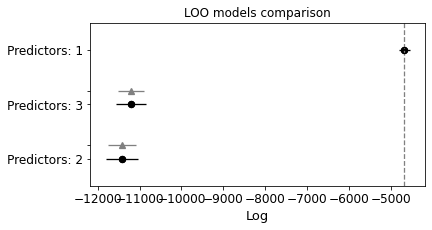

In [67]:
loo = az.compare(to_comp, ic="loo")
az.plot_compare(loo)
plt.title("LOO models comparison")
plt.show()

### WAIC model comparison

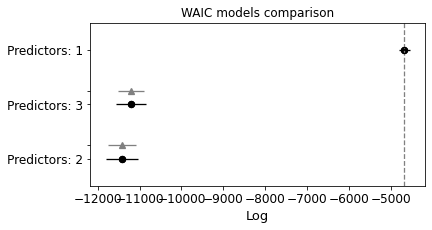

In [68]:
waic = az.compare(to_comp, ic="waic")
az.plot_compare(waic)
plt.title("WAIC models comparison")
plt.show()